In [39]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilities import train_test_val_split, rmse, load_matlab_data
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
matlab_data = loadmat("data/hwk8data.mat")
print(matlab_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'data', 'test1', 'test2'])


In [4]:
data = matlab_data['data']
test1 = matlab_data['test1']
test2 = matlab_data['test2']

In [6]:
print(data.shape)

(450, 21)


In [10]:
pca = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA())
])

In [11]:
pca.fit(data)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [12]:
pca_step = pca.named_steps['pca']

In [13]:
pca_step.explained_variance_ratio_

array([3.63701261e-01, 3.02539076e-01, 1.01252075e-01, 8.71841161e-02,
       3.90287586e-02, 2.92970581e-02, 2.00417346e-02, 1.46178454e-02,
       1.09556989e-02, 8.79849632e-03, 6.21427966e-03, 4.54049314e-03,
       3.66956009e-03, 2.97681955e-03, 2.09816267e-03, 1.16138422e-03,
       8.86980050e-04, 4.21982828e-04, 3.83308129e-04, 1.55319273e-04,
       7.55899108e-05])

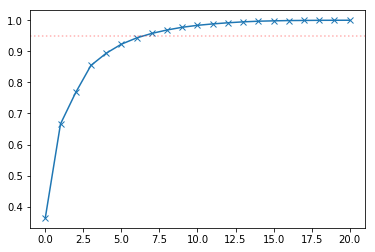

In [18]:
plt.plot(np.cumsum(pca_step.explained_variance_ratio_), 'x-')
plt.axhline(y=0.95, color='r', linestyle=':', alpha=0.3)

In [22]:
np.argwhere(np.cumsum(pca_step.explained_variance_ratio_) >= 0.95)[0]

array([7])

Must include the first 8 PC's (zero-index)

In [23]:
pca95 = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

In [24]:
pca95.fit(data)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [25]:
pca = pca95.named_steps['pca']

In [26]:
pca.n_components_

8

Text(0, 0.5, 'PC1')

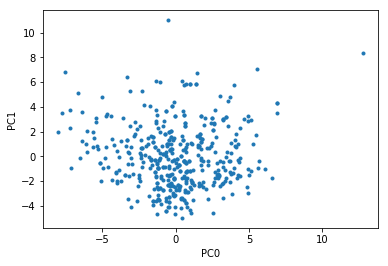

In [29]:
pca_data = pca95.transform(data)
plt.plot(pca_data[:,0], pca_data[:,1], '.')
plt.xlabel("PC0")
plt.ylabel("PC1")

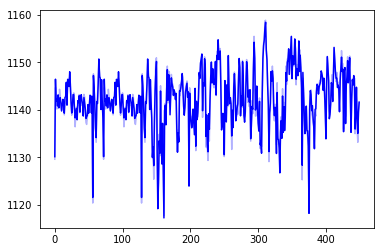

In [31]:
plt.plot(pca95.inverse_transform(pca_data)[:,0], color='b')
plt.plot(data[:,0], alpha=0.3, color='b')

In [35]:
df = pd.DataFrame(data)
df = df.append(pd.DataFrame(test1))
df = df.append(pd.DataFrame(test2))

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1129.625000,1123.437988,1122.687988,1104.0,1104.0,1091.0,1073.0,1003.0,740.0,479.0,1167.687988,1168.125000,1162.000000,1151.562988,1123.062988,1092.750000,1002.093994,822.781006,633.093994,483.687988,20.839001
1,1144.687988,1144.625000,1140.187988,1120.0,1123.0,1107.0,1091.0,1033.0,774.0,477.0,1176.875000,1167.687988,1168.562988,1159.750000,1136.187988,1111.750000,1039.000000,861.281006,658.875000,479.187988,21.020000
2,1141.250000,1138.875000,1135.187988,1115.0,1122.0,1110.0,1091.0,1025.0,766.0,475.0,1172.312988,1168.937988,1161.000000,1152.375000,1127.250000,1107.375000,1038.062988,853.281006,665.375000,484.296997,21.139000
3,1140.187988,1141.062988,1139.250000,1118.0,1118.0,1103.0,1081.0,1025.0,781.0,482.0,1170.125000,1157.250000,1162.125000,1146.562988,1124.375000,1104.562988,1043.687988,865.375000,673.187988,493.093994,20.896000
4,1140.687988,1138.375000,1136.125000,1114.0,1124.0,1114.0,1101.0,1048.0,807.0,487.0,1163.812988,1154.750000,1157.062988,1148.062988,1124.062988,1105.187988,1042.687988,870.468994,671.593994,484.390991,21.132000


In [38]:
labels = ["data"] * data.shape[0]
labels.extend(["test1"] * test1.shape[0])
labels.extend(["test2"] * test2.shape[0])
df["label"] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,label
0,1129.625000,1123.437988,1122.687988,1104.0,1104.0,1091.0,1073.0,1003.0,740.0,479.0,1167.687988,1168.125000,1162.000000,1151.562988,1123.062988,1092.750000,1002.093994,822.781006,633.093994,483.687988,20.839001,data
1,1144.687988,1144.625000,1140.187988,1120.0,1123.0,1107.0,1091.0,1033.0,774.0,477.0,1176.875000,1167.687988,1168.562988,1159.750000,1136.187988,1111.750000,1039.000000,861.281006,658.875000,479.187988,21.020000,data
2,1141.250000,1138.875000,1135.187988,1115.0,1122.0,1110.0,1091.0,1025.0,766.0,475.0,1172.312988,1168.937988,1161.000000,1152.375000,1127.250000,1107.375000,1038.062988,853.281006,665.375000,484.296997,21.139000,data
3,1140.187988,1141.062988,1139.250000,1118.0,1118.0,1103.0,1081.0,1025.0,781.0,482.0,1170.125000,1157.250000,1162.125000,1146.562988,1124.375000,1104.562988,1043.687988,865.375000,673.187988,493.093994,20.896000,data
4,1140.687988,1138.375000,1136.125000,1114.0,1124.0,1114.0,1101.0,1048.0,807.0,487.0,1163.812988,1154.750000,1157.062988,1148.062988,1124.062988,1105.187988,1042.687988,870.468994,671.593994,484.390991,21.132000,data


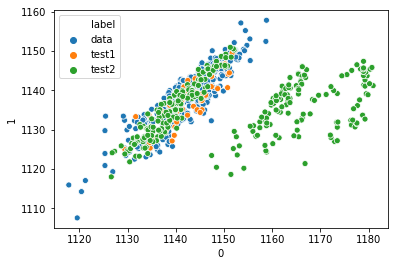

In [41]:
sns.scatterplot(x=0, y=1, hue="label", data=df)

Sure enough, `test1` is mostly grouped with `data` while some of `test2` is clearly separate

In [ ]:
def tstat1(data, pca_model, num_pcs=None):
    observations, inputs = data.shape
    